Logistic Regression with Softmax

Reference:  
[1] http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/  

[2] https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/  

[3] https://zhuanlan.zhihu.com/p/98061179?utm_source=wechat_session&utm_medium=social&utm_oi=777418892074061824  

[4] https://github.com/hankcs/CS224n/tree/master/assignment1  

[5] https://github.com/hartikainen/stanford-cs224n/tree/master/assignment1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Competition/train.csv')

In [ ]:
y_all_train = data.iloc[:, -1]

In [ ]:
y_all_train.shape

(47760,)

In [ ]:
def label_percentages(labels):
  n0 = 0
  n1 = 0
  n2 = 0
  total = labels.shape[0]
  for label in labels:
    if label == 0:
      n0 += 1
    elif label == 1:
      n1 += 1
    elif label == 2:
      n2 += 1
  
  return (n0, n1, n2), (n0/total, n1/total, n2/total), total 

In [ ]:
label_percentages(y_all_train)

((37535, 2002, 8223),
 (0.7859087102177554, 0.0419179229480737, 0.17217336683417087),
 47760)

In [ ]:
test = pd.read_csv('/content/drive/My Drive/Competition/test.csv')

In [ ]:
all_features = pd.concat([data.iloc[:, :-1], test]).reset_index(drop=True)

In [ ]:
def preprocessing(features):
  X = features.copy()
  X = X.iloc[:, 1:19]
  X = X.drop(columns="PS")
  X = X.drop(columns="PRECT")
  X.insert(0, 'bias', 1)
  X_means = np.mean(X)
  X_std = np.std(X)
  X_scale = (X - X_means) / X_std
  X_scale.iloc[:, 0] = np.ones((X_scale.shape[0], 1))
  return X_scale 

In [ ]:
features_scale = preprocessing(all_features)
features_scale

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,TS,TREFHT,Z1000,Z200,ZBOT
0,1.0,-0.952799,-0.659826,-1.456660,-0.544970,1.082394,-0.689690,1.750971,-1.019028,1.385133,1.999031,-0.706613,-0.697123,-0.878724,1.429216,-0.428562,-0.950613
1,1.0,1.167947,0.208099,0.980482,1.330311,2.126323,1.095283,2.212530,1.028018,-1.364069,1.457275,1.322146,1.099047,1.426394,-1.477796,1.277024,1.390600
2,1.0,1.167947,0.185259,-1.798887,-0.270104,-1.403102,-0.220842,-1.095445,-1.715713,0.589421,-0.453372,-1.322884,0.408776,-0.869240,0.569875,-1.436404,-1.105605
3,1.0,0.717160,-0.393358,1.393384,0.109542,-0.322441,0.959048,-0.313340,1.097092,-1.325220,0.640182,0.839604,0.866538,0.765701,-1.448546,0.646658,0.828448
4,1.0,-0.942553,-0.682666,-0.894244,-0.988140,-1.196643,-1.202690,-0.838749,-0.673120,1.796060,-1.153855,-0.218553,-0.645590,-0.435143,1.907489,-0.231807,-0.471490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,1.0,1.178192,0.177646,1.257555,-0.070115,-1.906459,0.752188,-2.054562,1.622598,-1.471042,1.792867,1.259184,1.119882,1.320941,-1.587032,1.305469,1.388401
55076,1.0,1.178192,0.185259,1.331331,0.049520,-2.030020,0.963159,-2.102031,1.736878,-1.543805,1.825305,1.316120,1.121708,1.297473,-1.587138,1.295185,1.384040
55077,1.0,1.178192,0.192872,1.504772,0.199574,-2.240993,1.175167,-2.110102,1.825097,-1.597136,1.806360,1.377637,1.138237,1.273246,-1.587472,1.303790,1.370240
55078,1.0,1.178192,0.200486,1.618416,0.349145,-2.518317,1.395306,-2.125182,1.848681,-1.645236,1.853711,1.464180,1.138237,1.268741,-1.587581,1.307511,1.365763


In [ ]:
len_data = data.shape[0]

In [ ]:
# separate data and test data
train_data = features_scale.iloc[0:len_data, :]
test_data = features_scale.iloc[len_data:features_scale.shape[0], :]
train_data.shape, test_data.shape

((47760, 17), (7320, 17))

In [ ]:
train_data

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,TS,TREFHT,Z1000,Z200,ZBOT
0,1.0,-0.952799,-0.659826,-1.456660,-0.544970,1.082394,-0.689690,1.750971,-1.019028,1.385133,1.999031,-0.706613,-0.697123,-0.878724,1.429216,-0.428562,-0.950613
1,1.0,1.167947,0.208099,0.980482,1.330311,2.126323,1.095283,2.212530,1.028018,-1.364069,1.457275,1.322146,1.099047,1.426394,-1.477796,1.277024,1.390600
2,1.0,1.167947,0.185259,-1.798887,-0.270104,-1.403102,-0.220842,-1.095445,-1.715713,0.589421,-0.453372,-1.322884,0.408776,-0.869240,0.569875,-1.436404,-1.105605
3,1.0,0.717160,-0.393358,1.393384,0.109542,-0.322441,0.959048,-0.313340,1.097092,-1.325220,0.640182,0.839604,0.866538,0.765701,-1.448546,0.646658,0.828448
4,1.0,-0.942553,-0.682666,-0.894244,-0.988140,-1.196643,-1.202690,-0.838749,-0.673120,1.796060,-1.153855,-0.218553,-0.645590,-0.435143,1.907489,-0.231807,-0.471490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47755,1.0,-1.208927,2.050537,-1.559338,0.542162,0.960851,0.282271,0.865639,-1.501326,0.993904,-1.375851,-1.257286,-1.697916,-1.657530,0.967759,-1.743022,-1.610599
47756,1.0,-0.963044,-0.659826,-0.419844,1.410663,-0.103645,1.506244,-1.000442,-0.183821,0.316672,-1.348457,-0.101315,-0.514210,-0.159250,0.332354,-0.149713,-0.127310
47757,1.0,-1.208927,2.050537,-1.075436,1.198620,-1.466387,0.950071,-1.395281,-0.956686,0.436830,-0.253495,-0.046649,-1.968044,-1.510835,0.391302,-0.447305,-1.371825
47758,1.0,1.157701,0.177646,0.818513,-0.347110,0.046155,-0.779050,0.281748,1.554312,0.148711,0.020024,0.395211,1.165682,1.152494,0.220494,0.832889,1.221467


In [ ]:
test_data

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,TS,TREFHT,Z1000,Z200,ZBOT
47760,1.0,-1.229417,2.042923,-0.969527,-0.199640,-0.019019,-0.908190,-0.249263,-1.533322,2.257725,-0.176336,-1.733819,-2.067347,-1.935251,2.280513,-1.998425,-1.874896
47761,1.0,-1.229417,2.050537,-1.033650,-0.208858,0.073115,-1.022537,-0.056414,-1.611895,2.270233,-0.209462,-1.714158,-2.067530,-1.970182,2.288535,-1.998483,-1.924181
47762,1.0,-1.229417,2.058150,-1.115755,-0.218882,0.146943,-1.088501,0.171496,-1.659356,2.290553,-0.308297,-1.704051,-2.067530,-2.027278,2.303500,-1.986739,-1.988489
47763,1.0,-1.229417,2.065764,-1.153955,-0.218557,0.240390,-1.077335,0.400787,-1.703007,2.295390,-0.408942,-1.678193,-2.050762,-2.081848,2.302972,-1.977785,-2.049826
47764,1.0,-1.229417,2.073377,-1.182211,-0.208022,0.401727,-1.028380,0.603821,-1.759042,2.283319,-0.452777,-1.628448,-2.043577,-2.088527,2.289048,-1.972756,-2.065368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,1.0,1.178192,0.177646,1.257555,-0.070115,-1.906459,0.752188,-2.054562,1.622598,-1.471042,1.792867,1.259184,1.119882,1.320941,-1.587032,1.305469,1.388401
55076,1.0,1.178192,0.185259,1.331331,0.049520,-2.030020,0.963159,-2.102031,1.736878,-1.543805,1.825305,1.316120,1.121708,1.297473,-1.587138,1.295185,1.384040
55077,1.0,1.178192,0.192872,1.504772,0.199574,-2.240993,1.175167,-2.110102,1.825097,-1.597136,1.806360,1.377637,1.138237,1.273246,-1.587472,1.303790,1.370240
55078,1.0,1.178192,0.200486,1.618416,0.349145,-2.518317,1.395306,-2.125182,1.848681,-1.645236,1.853711,1.464180,1.138237,1.268741,-1.587581,1.307511,1.365763


# Logistic Regression with Softmax

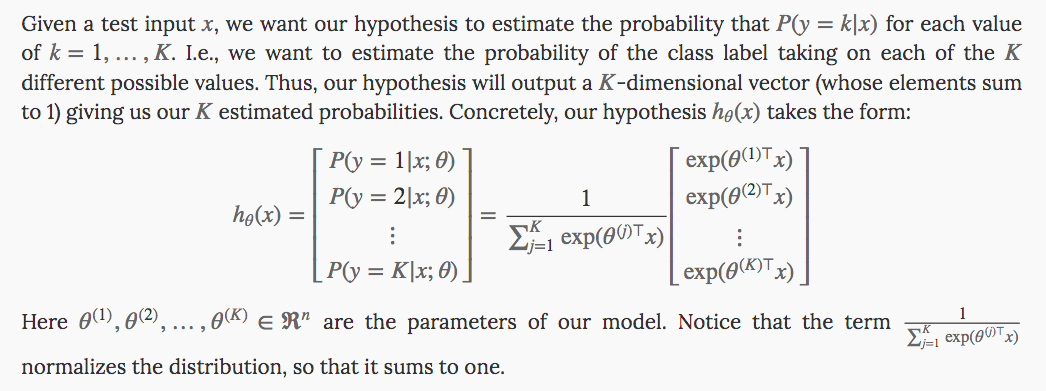  
(http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/)

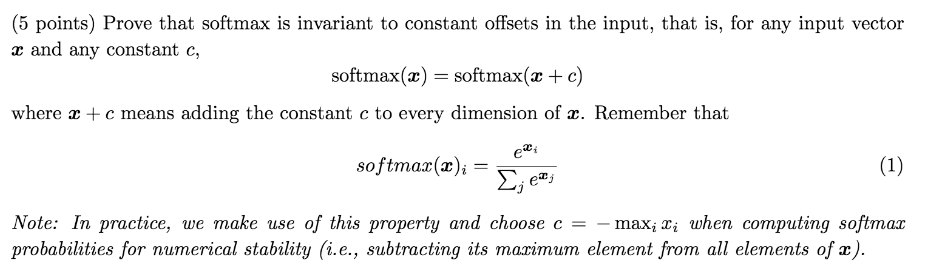  

(Standford CS 224n 2017W, assignement 1)

In [ ]:
# input product = X * theta 
def softmax(product):
    if len(product.shape) > 1:
      max_each_row = np.max(product, axis=1, keepdims=True)
      exps = np.exp(product - max_each_row)
      sum_exps = np.sum(exps, axis=1, keepdims=True)
      res = exps / sum_exps

    else:
        product_max = np.max(product)
        product = product - product_max
        numerator = np.exp(product)
        denominator = 1.0 / np.sum(numerator)
        res = numerator.dot(denominator)
    return res

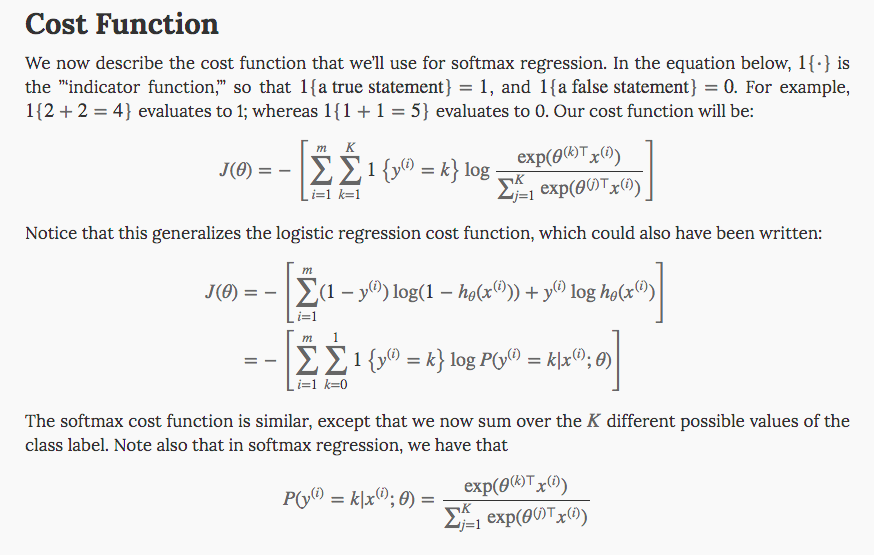  
(http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/)

**Regularized Cost Function**

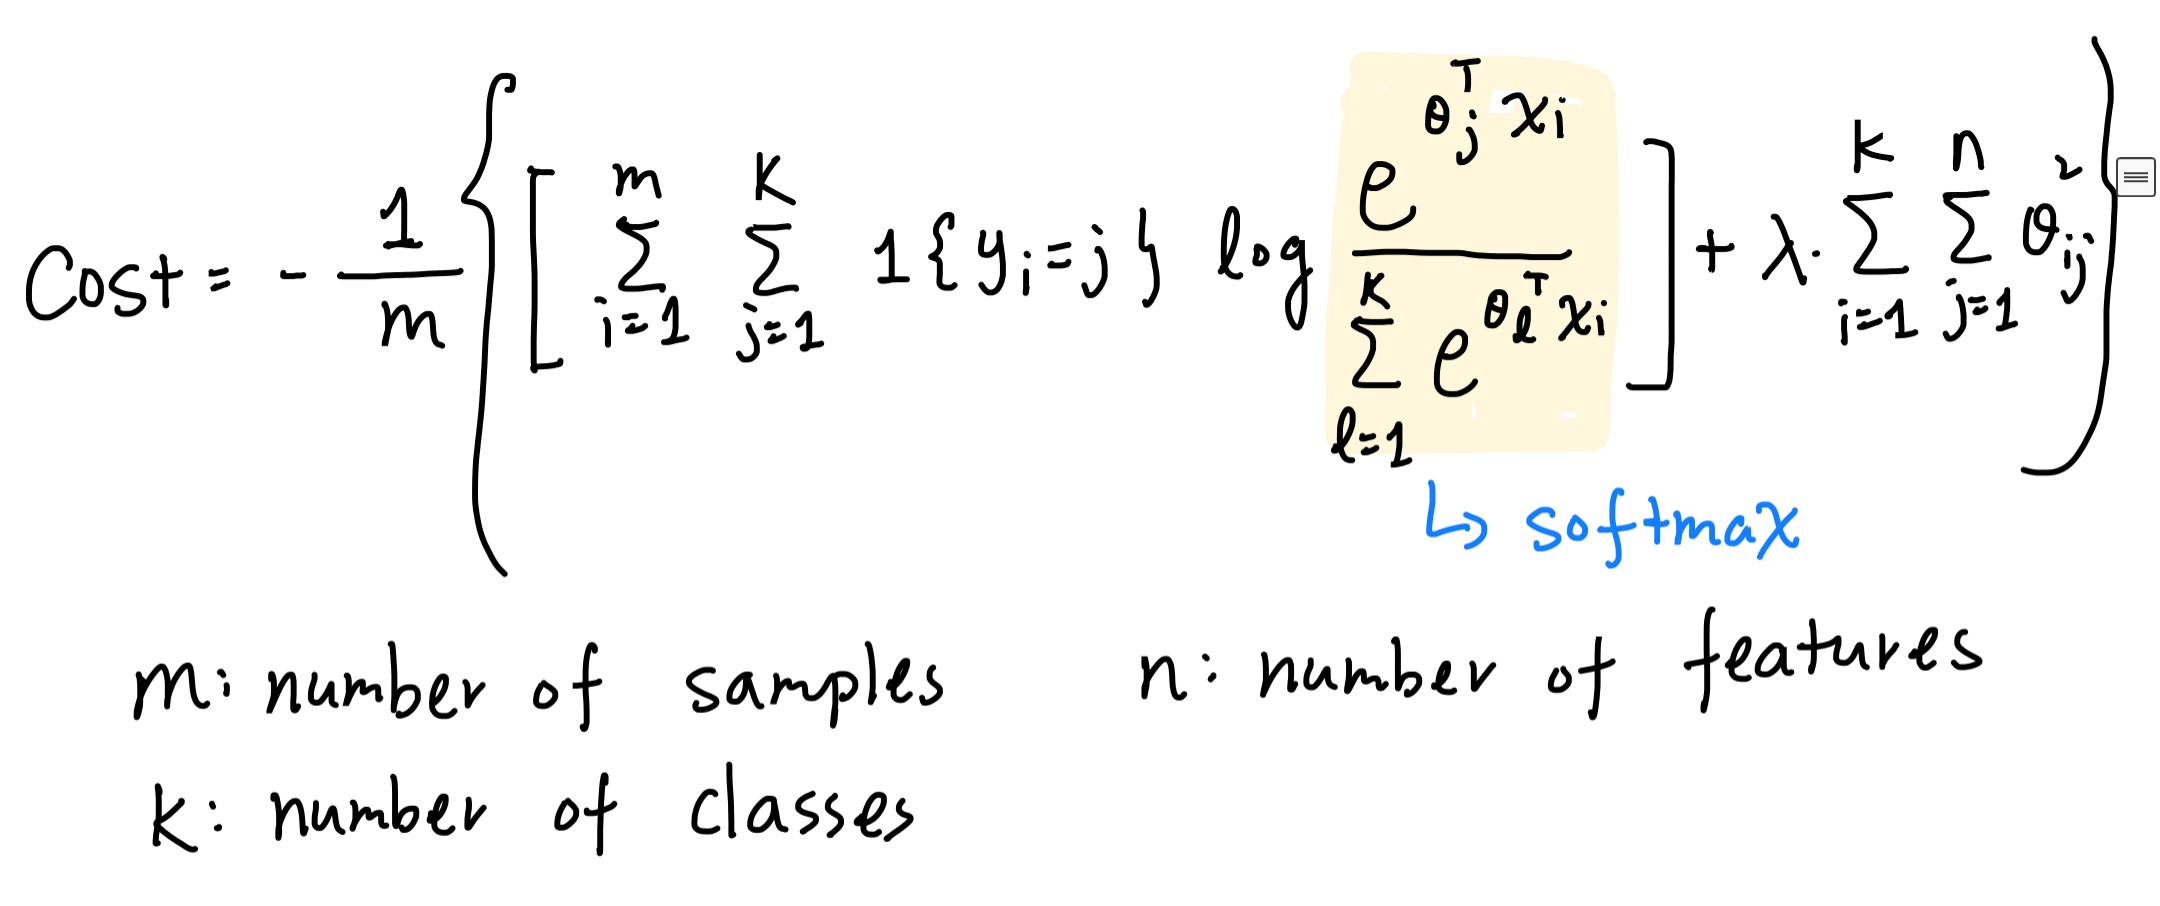

We should not regularize the $\theta_0 $

In [ ]:
def reg_cost_softmax(X, y_onehot, theta, lambda_):
  n_samples = X.shape[0]
  softmax_res = softmax(np.dot(X, theta.T))  # (n_samples, n_classes)
  cost = - (1.0 / n_samples) * np.sum(y_onehot * np.log(softmax_res))

  theta_without_bias = theta[:, 1:theta.shape[1]]     
  reg = lambda_ / n_samples  * np.sum(theta_without_bias ** 2)
  return cost + reg 

**Gradient with L2 Regularization**

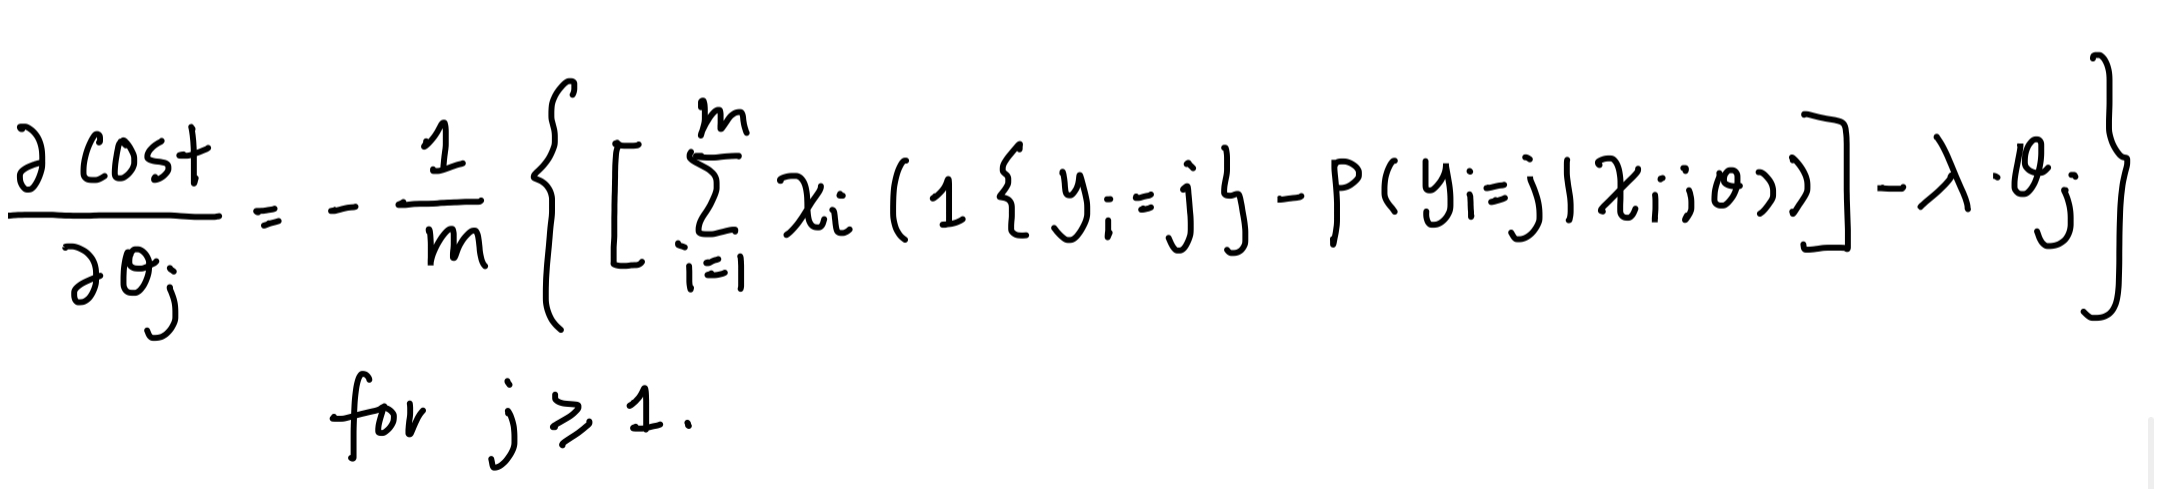

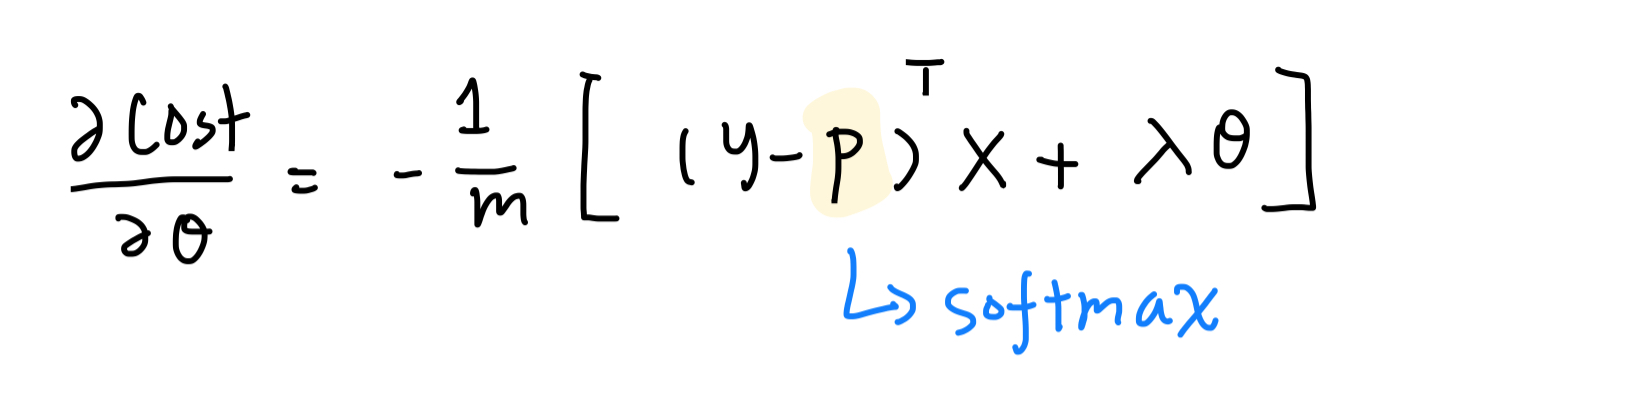

We should not regularize the $\theta_0 $

In [ ]:
def reg_gradient_softmax(X, y_onehot, theta, lambda_):
  n_samples = X.shape[0]
  softmax_res = softmax(np.dot(X, theta.T))

  gradient = (-1.0 / n_samples) * np.dot((y_onehot - softmax_res).T, X)
  # (n_classes, n_features)

  theta_without_bias = theta[:, 1:theta.shape[1]]    
  # theta: (n_classes, n_features) 
  # n_feautres = X features + 1(bias term)
  # theta_without_bias: (n_classes, n_features - 1)
  reg = -lambda_ / n_samples * theta_without_bias

  gradient[:, 1:gradient.shape[1]] = gradient[:, 1:gradient.shape[1]] + reg

  return gradient

**Gradient Descent**

In [ ]:
# alpha is learning rate
def gradient_descent(X, y_onehot, theta, lambda_, eps, alpha, max_iter): 
  losses = []
  i = 0
  print("Iteration: Cost")

  while(i < max_iter):
    i += 1
    grad = reg_gradient_softmax(X, y_onehot, theta, lambda_)
    theta -= alpha * grad

    loss = reg_cost_softmax(X, y_onehot, theta, lambda_)    
    if (i % 1000 == 0):     
      print("{}: {:.8f}".format(i, loss))
    
    len_losses = len(losses)
    if (len_losses == 0):
      print("{}: {:.8f}".format(i, loss))
      diff = np.abs(loss)
    else :
      diff = np.abs(losses[len_losses-1] - loss)

    losses.append(loss)
    if(diff < eps):
      return theta, losses

  return theta, losses

# Trainining model

In [ ]:
y_all_train.shape

(47760,)

In [ ]:
def split_train_test(X, y, training_size, val_size):
  m = X.shape[0]
  nb_train = (int) (m * training_size)
  X_train = X.iloc[0:nb_train, :]
  y_train = y[0:nb_train]

  nb_val = (int) (m * val_size)

  val_index = nb_train + nb_val
  X_val = X.iloc[nb_train : val_index, :]
  y_val = y[nb_train : val_index]

  X_test = X.iloc[val_index : m, :]
  y_test = y[val_index : m]
  return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
def onehot_y(labels, classes):
    size = labels.shape[0]
    result = np.zeros((size, classes))
    for i in range(size):
        cl = int(labels[i])
        result[i][cl] = 1
    return result

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_train_test(train_data, y_all_train, 0.8, 0.1)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((38208, 17), (38208,), (4776, 17), (4776,), (4776, 17), (4776,))

In [ ]:
y_label = pd.Series.to_numpy(y_train.copy())

In [ ]:
y_onehot = onehot_y(y_label, 3)
y_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
y_onehot.shape

(38208, 3)

In [ ]:
X_train_array = X_train.copy().to_numpy()
X_train_array

array([[ 1.        , -0.95279851, -0.65982622, ...,  1.42921582,
        -0.4285615 , -0.9506135 ],
       [ 1.        ,  1.16794656,  0.20809904, ..., -1.47779616,
         1.27702377,  1.39059963],
       [ 1.        ,  1.16794656,  0.1852589 , ...,  0.56987529,
        -1.43640373, -1.10560504],
       ...,
       [ 1.        ,  1.09623054, -0.61414595, ..., -0.33071481,
        -0.02934039, -0.88646481],
       [ 1.        ,  0.69666987, -0.38574456, ..., -1.14146989,
         0.86990277,  1.06717879],
       [ 1.        ,  0.70691502, -0.40097132, ..., -1.08116037,
         0.6735045 ,  0.990746  ]])

In [ ]:
X_train_array.shape

(38208, 17)

In [ ]:
# y_train: onehot of y
# lambda_: hyperparameter for regularization (or penalty)
# alpha: learning rate
# theta0: dim is (n, nb_classes) n is number of features including bias term 
# return theta 
# X, y, theta, lambda_, eps, alpha, max_iter, batch_size for sgd 

def train(X_train, y_train, theta0, lambda_, eps, alpha, max_iter, nb_classes):
  n_features = X_train.shape[1]  # number of features including bias term 
  theta, losses = gradient_descent(X_train, y_train, theta0, lambda_, eps, alpha, max_iter)   
  return theta, losses

In [ ]:
def plot_loss(losses):
  plt.figure(figsize=(8, 6))  
  plt.plot([i for i in range(len(losses))], losses)
  plt.show()

In [ ]:
theta0 = np.zeros((3, 17))

In [ ]:
# learning rate = 0.85 and lambda = 0
final_theta_0_85, losses_0_85 = train(X_train_array, y_onehot, theta0, 0, 10^-6, 0.85, 8000, 3)

Iteration: Cost
1: 0.84122577
1000: 0.42055552
2000: 0.41996294
3000: 0.41963985
4000: 0.41939887
5000: 0.41919385
6000: 0.41901017
7000: 0.41884251
8000: 0.41868849


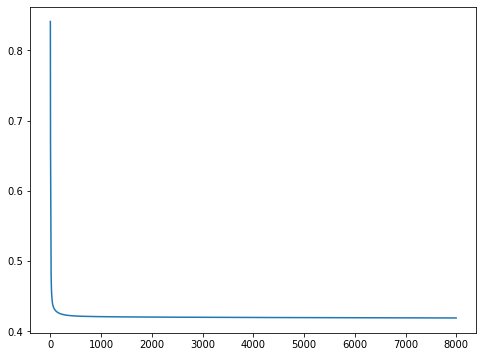

In [ ]:
plot_loss(losses_0_85)

In [ ]:
def calculate_accuracy(X_test, y_test, theta):
  X_test_array = X_test.to_numpy()
  mat = X_test_array.dot(theta.T)
  y_pred = np.argmax(mat, axis=1)
  y_test_array = y_test.to_numpy()
  accuracy_rate = np.sum(y_test_array == y_pred) / y_test_array.shape[0]
  return accuracy_rate

In [ ]:
accuracy_on_train = calculate_accuracy(X_train, y_train, final_theta_0_85)
accuracy_on_train

0.8234401172529313

In [ ]:
accuracy_on_val = calculate_accuracy(X_val, y_val, final_theta_0_85)
accuracy_on_val

0.8140703517587939

In [ ]:
accuracy_on_test = calculate_accuracy(X_test, y_test, final_theta_0_85)
accuracy_on_test

0.8134422110552764

# Hyperparameter Tuning

In [ ]:
def hyperparameter_tuning(lambda_list, X_train, y_onehot, X_test, y_test, eps, alpha, max_iter, nb_classes):
  n = X_train.shape[1]
  all_theta = {}
  all_losses = {}
  print("Hyperparameter tuning: Lambda")
  for each_lambda in lambda_list:
    theta0 = np.zeros((3, 17))
    print(each_lambda)
    theta, loss_dict = train(X_train, y_onehot, theta0, each_lambda, eps, alpha, max_iter, nb_classes)
    all_theta[each_lambda] = theta
    all_losses[each_lambda] = loss_dict
    accuracy = calculate_accuracy(X_test, y_test, theta)
    print("accuracy for lambda = {}: {:.8f}".format(each_lambda, accuracy))    
    print("-------------------------------------------------")
  
  return all_theta, all_losses 

In [ ]:
all_theta, all_losses = hyperparameter_tuning([1, 3], X_train, y_onehot, X_val, y_val, 10^-6, 0.85, 5000, 3)

Hyperparameter tuning: Lambda
1
Iteration: Cost
1: 0.84122942
1000: 0.42076321
2000: 0.42022391
3000: 0.41994593
4000: 0.41974874
5000: 0.41958812
accuracy for lambda = 1: 0.81344221
-------------------------------------------------
3
Iteration: Cost
1: 0.84123672
1000: 0.42119166
2000: 0.42077951
3000: 0.42062294
4000: 0.42055778
5000: 0.42054738
accuracy for lambda = 3: 0.81386097
-------------------------------------------------


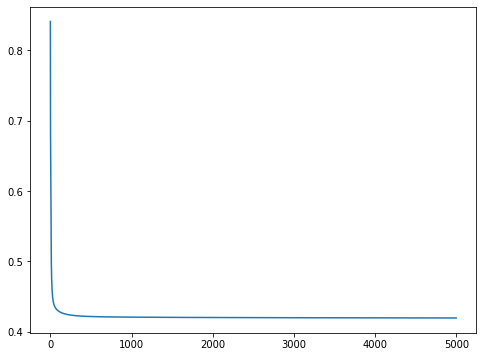

In [ ]:
plot_loss(all_losses[1])

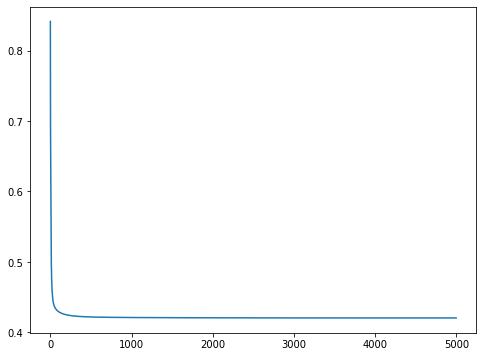

In [ ]:
plot_loss(all_losses[3])

In [ ]:
def check_accuracy(X_train, y_train, X_val, y_val, X_test, y_test, theta):
  train_acc = calculate_accuracy(X_train, y_train, theta)
  print("accuracy on X_train =  {:.8f}".format(train_acc))    
  val_acc = calculate_accuracy(X_val, y_val, theta)
  print("accuracy on X_val = {:.8f}".format(val_acc))  
  test_acc = calculate_accuracy(X_test, y_test, theta)
  print("accuracy on X_test = {:.8f}".format(test_acc))  

In [ ]:
check_accuracy(X_train, y_train, X_val, y_val, X_test, y_test, all_theta[1])

accuracy on X_train =  0.82312605
accuracy on X_val = 0.81344221
accuracy on X_test = 0.81344221


In [ ]:
check_accuracy(X_train, y_train, X_val, y_val, X_test, y_test, all_theta[3])

accuracy on X_train =  0.82328308
accuracy on X_val = 0.81386097
accuracy on X_test = 0.81323283


# Prediction

In [ ]:
test_data

,bias,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PSL,T200,T500,TS,TREFHT,Z1000,Z200,ZBOT
47760,1.0,-1.229417,2.042923,-0.969527,-0.199640,-0.019019,-0.908190,-0.249263,-1.533322,2.257725,-0.176336,-1.733819,-2.067347,-1.935251,2.280513,-1.998425,-1.874896
47761,1.0,-1.229417,2.050537,-1.033650,-0.208858,0.073115,-1.022537,-0.056414,-1.611895,2.270233,-0.209462,-1.714158,-2.067530,-1.970182,2.288535,-1.998483,-1.924181
47762,1.0,-1.229417,2.058150,-1.115755,-0.218882,0.146943,-1.088501,0.171496,-1.659356,2.290553,-0.308297,-1.704051,-2.067530,-2.027278,2.303500,-1.986739,-1.988489
47763,1.0,-1.229417,2.065764,-1.153955,-0.218557,0.240390,-1.077335,0.400787,-1.703007,2.295390,-0.408942,-1.678193,-2.050762,-2.081848,2.302972,-1.977785,-2.049826
47764,1.0,-1.229417,2.073377,-1.182211,-0.208022,0.401727,-1.028380,0.603821,-1.759042,2.283319,-0.452777,-1.628448,-2.043577,-2.088527,2.289048,-1.972756,-2.065368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55075,1.0,1.178192,0.177646,1.257555,-0.070115,-1.906459,0.752188,-2.054562,1.622598,-1.471042,1.792867,1.259184,1.119882,1.320941,-1.587032,1.305469,1.388401
55076,1.0,1.178192,0.185259,1.331331,0.049520,-2.030020,0.963159,-2.102031,1.736878,-1.543805,1.825305,1.316120,1.121708,1.297473,-1.587138,1.295185,1.384040
55077,1.0,1.178192,0.192872,1.504772,0.199574,-2.240993,1.175167,-2.110102,1.825097,-1.597136,1.806360,1.377637,1.138237,1.273246,-1.587472,1.303790,1.370240
55078,1.0,1.178192,0.200486,1.618416,0.349145,-2.518317,1.395306,-2.125182,1.848681,-1.645236,1.853711,1.464180,1.138237,1.268741,-1.587581,1.307511,1.365763


In [ ]:
n = test_data.shape[1] 
nb_classes = 3
theta0 = np.zeros((3, 17))
# X_train, y_onehot, theta0, each_lambda, eps, alpha, max_iter, nb_classes
lambda_ = 3
eps = 10^-6
alpha = 0.85
max_iter = 4000
final_theta, loss_final = train(X_train, y_onehot, theta0, lambda_, eps, alpha, max_iter, nb_classes)


Iteration: Cost
1: 0.84123672
1000: 0.42119166
2000: 0.42077951
3000: 0.42062294
4000: 0.42055778


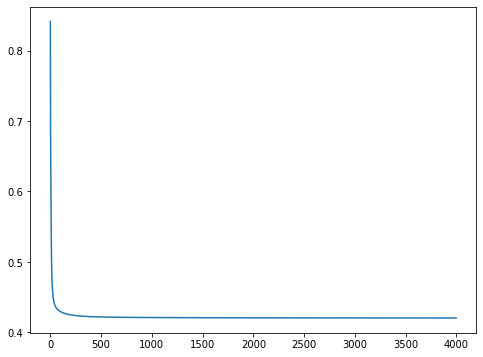

In [ ]:
plot_loss(loss_final)

In [ ]:
# accuracy on X_train
calculate_accuracy(X_train, y_train, final_theta)

0.8234662897822446

In [ ]:
# accuracy on split X_val 
calculate_accuracy(X_val, y_val, final_theta)

0.8138609715242882

In [ ]:
# accuracy on split X_test
calculate_accuracy(X_test, y_test, final_theta)

0.8138609715242882

In [ ]:
mat_prob_test = test_data.dot(final_theta.T)
mat_prob_test

,0,1,2
47760,4.556023,-7.667289,3.111266
47761,4.602816,-7.756571,3.153755
47762,4.688239,-7.892798,3.204560
47763,4.742801,-7.966166,3.223365
47764,4.720127,-7.910267,3.190139
...,...,...,...
55075,1.889559,0.603445,-2.493003
55076,1.822941,0.651805,-2.474746
55077,1.709969,0.691091,-2.401060
55078,1.600662,0.744508,-2.345170


In [ ]:
mat_prob_test_array = mat_prob_test.to_numpy()
mat_prob_test_array

array([[ 4.55602338, -7.66728914,  3.11126576],
       [ 4.60281606, -7.75657117,  3.15375511],
       [ 4.68823894, -7.89279848,  3.20455953],
       ...,
       [ 1.70996931,  0.69109068, -2.40105999],
       [ 1.60066155,  0.74450838, -2.34516993],
       [ 1.57404053,  0.72148489, -2.29552542]])

In [ ]:
pred_test = np.argmax(mat_prob_test_array, axis=1)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
label_percentages(pred_test)

((6408, 209, 703),
 (0.8754098360655738, 0.028551912568306012, 0.09603825136612022),
 7320)

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/Competition/sample_submission.csv')
submission

,S.No,LABELS
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
7315,7315,1
7316,7316,1
7317,7317,1
7318,7318,1


In [ ]:
submission.iloc[:,1] = pred_test
submission

,S.No,LABELS
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
7315,7315,0
7316,7316,0
7317,7317,0
7318,7318,0


In [ ]:
from google.colab import files
submission.to_csv('submission_pred.csv', index=False)
files.download('submission_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>